In [1]:
%pip install polars
%pip install pandas
import polars as pl
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [213]:
data = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')


In [214]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,2023-05-31,2023-05-31,Run,441,3.775480,2257,9.95987,1.079440,6.02418,55.5843,148.0,5956.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7306474522
1,2023-05-30,2023-05-30,Run,435,3.726690,2160,9.65837,0.467835,6.21223,128.2500,145.0,5683.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7304267641
2,2023-05-30,2023-05-29,Run,138,0.999997,720,12.00000,0.000000,5.00000,0.0000,NaN,1876.0,b'',Map My Fitness MapMyFitness Web,http://www.mapmyfitness.com/workout/7304397904
3,2023-05-30,2023-05-29,Walk,150,0.999997,840,14.00000,0.000000,4.28571,0.0000,NaN,2213.0,b'',Map My Fitness MapMyFitness Web,http://www.mapmyfitness.com/workout/7304395009
4,2023-05-29,2023-05-29,Run,1151,9.017680,5609,10.36440,0.989736,5.78906,60.6222,153.0,14653.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7302616744


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          832 non-null    object 
 1   Workout Date            832 non-null    object 
 2   Activity Type           832 non-null    object 
 3   Calories Burned (kCal)  832 non-null    int64  
 4   Distance (mi)           832 non-null    float64
 5   Workout Time (seconds)  832 non-null    int64  
 6   Avg Pace (min/mi)       832 non-null    float64
 7   Max Pace (min/mi)       832 non-null    float64
 8   Avg Speed (mi/h)        832 non-null    float64
 9   Max Speed (mi/h)        832 non-null    float64
 10  Avg Heart Rate          573 non-null    float64
 11  Steps                   809 non-null    float64
 12  Notes                   832 non-null    object 
 13  Source                  832 non-null    object 
 14  Link                    832 non-null    ob

In [216]:
data['Date Submitted'] = pd.to_datetime(data['Date Submitted'])

In [217]:
#data['Date Submitted'].describe()
data.isnull().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Max Pace (min/mi)           0
Avg Speed (mi/h)            0
Max Speed (mi/h)            0
Avg Heart Rate            259
Steps                      23
Notes                       0
Source                      0
Link                        0
dtype: int64

In [218]:
missing_data = data.isnull()
missing_data.head(5)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [219]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Date Submitted
False    832
Name: Date Submitted, dtype: int64

Workout Date
False    832
Name: Workout Date, dtype: int64

Activity Type
False    832
Name: Activity Type, dtype: int64

Calories Burned (kCal)
False    832
Name: Calories Burned (kCal), dtype: int64

Distance (mi)
False    832
Name: Distance (mi), dtype: int64

Workout Time (seconds)
False    832
Name: Workout Time (seconds), dtype: int64

Avg Pace (min/mi)
False    832
Name: Avg Pace (min/mi), dtype: int64

Max Pace (min/mi)
False    832
Name: Max Pace (min/mi), dtype: int64

Avg Speed (mi/h)
False    832
Name: Avg Speed (mi/h), dtype: int64

Max Speed (mi/h)
False    832
Name: Max Speed (mi/h), dtype: int64

Avg Heart Rate
False    573
True     259
Name: Avg Heart Rate, dtype: int64

Steps
False    809
True      23
Name: Steps, dtype: int64

Notes
False    832
Name: Notes, dtype: int64

Source
False    832
Name: Source, dtype: int64

Link
False    832
Name: Link, dtype: int64



In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          832 non-null    datetime64[ns]
 1   Workout Date            832 non-null    object        
 2   Activity Type           832 non-null    object        
 3   Calories Burned (kCal)  832 non-null    int64         
 4   Distance (mi)           832 non-null    float64       
 5   Workout Time (seconds)  832 non-null    int64         
 6   Avg Pace (min/mi)       832 non-null    float64       
 7   Max Pace (min/mi)       832 non-null    float64       
 8   Avg Speed (mi/h)        832 non-null    float64       
 9   Max Speed (mi/h)        832 non-null    float64       
 10  Avg Heart Rate          573 non-null    float64       
 11  Steps                   809 non-null    float64       
 12  Notes                   832 non-null    object    

In [221]:
print("Top 5 rows of the data")
data.head()

Top 5 rows of the data


,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,2023-05-31,2023-05-31,Run,441,3.775480,2257,9.95987,1.079440,6.02418,55.5843,148.0,5956.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7306474522
1,2023-05-30,2023-05-30,Run,435,3.726690,2160,9.65837,0.467835,6.21223,128.2500,145.0,5683.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7304267641
2,2023-05-30,2023-05-29,Run,138,0.999997,720,12.00000,0.000000,5.00000,0.0000,NaN,1876.0,b'',Map My Fitness MapMyFitness Web,http://www.mapmyfitness.com/workout/7304397904
3,2023-05-30,2023-05-29,Walk,150,0.999997,840,14.00000,0.000000,4.28571,0.0000,NaN,2213.0,b'',Map My Fitness MapMyFitness Web,http://www.mapmyfitness.com/workout/7304395009
4,2023-05-29,2023-05-29,Run,1151,9.017680,5609,10.36440,0.989736,5.78906,60.6222,153.0,14653.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7302616744


In [222]:
data.shape

(832, 15)

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          832 non-null    datetime64[ns]
 1   Workout Date            832 non-null    object        
 2   Activity Type           832 non-null    object        
 3   Calories Burned (kCal)  832 non-null    int64         
 4   Distance (mi)           832 non-null    float64       
 5   Workout Time (seconds)  832 non-null    int64         
 6   Avg Pace (min/mi)       832 non-null    float64       
 7   Max Pace (min/mi)       832 non-null    float64       
 8   Avg Speed (mi/h)        832 non-null    float64       
 9   Max Speed (mi/h)        832 non-null    float64       
 10  Avg Heart Rate          573 non-null    float64       
 11  Steps                   809 non-null    float64       
 12  Notes                   832 non-null    object    

In [224]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(data['Distance (mi)'])
data['target'] = labels
data.drop(columns=['Link', 'Source', 'Notes'], axis=1, inplace=True)

In [225]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
0,2023-05-31,2023-05-31,Run,441,3.775480,2257,9.95987,1.079440,6.02418,55.5843,148.0,5956.0,431
1,2023-05-30,2023-05-30,Run,435,3.726690,2160,9.65837,0.467835,6.21223,128.2500,145.0,5683.0,425
2,2023-05-30,2023-05-29,Run,138,0.999997,720,12.00000,0.000000,5.00000,0.0000,NaN,1876.0,51
3,2023-05-30,2023-05-29,Walk,150,0.999997,840,14.00000,0.000000,4.28571,0.0000,NaN,2213.0,51
4,2023-05-29,2023-05-29,Run,1151,9.017680,5609,10.36440,0.989736,5.78906,60.6222,153.0,14653.0,607


In [226]:
data.isnull().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Max Pace (min/mi)           0
Avg Speed (mi/h)            0
Max Speed (mi/h)            0
Avg Heart Rate            259
Steps                      23
target                      0
dtype: int64

In [227]:
data.drop('Date Submitted', axis=1, inplace=True)

In [228]:
data2 = data[data['Workout Time (seconds)'].values < 30000]


data3 = data2[data2['Workout Time (seconds)'].values > 0]

data4 = data3[data3['Activity Type'] == 'Run']

data5 = data4[data4['Max Pace (min/mi)'].values < 15]

In [229]:
data5.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,446.000000,672.000000,672.000000
mean,471.400298,3.708683,2253.186012,10.021523,1.272360,6.125784,56.300664,125.948430,5769.985119,342.465774
std,260.436792,1.973293,1353.391298,2.069059,2.021848,0.770917,152.983613,54.452326,3333.207441,148.414689
min,19.000000,0.178743,106.000000,7.774190,0.000000,1.377360,0.000000,0.000000,15.000000,2.000000
25%,380.250000,3.097620,1622.250000,9.106922,0.000000,5.872038,0.000000,130.250000,4287.500000,270.000000
50%,415.000000,3.102585,1842.500000,9.694925,0.802131,6.188805,31.569750,149.000000,4849.500000,303.500000
75%,515.500000,4.145360,2585.500000,10.217925,1.164265,6.588398,63.428000,156.000000,6465.250000,459.250000
max,1928.000000,13.481600,11065.000000,43.561600,13.660400,7.717840,1853.550000,173.000000,23604.000000,622.000000


In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Activity Type', ylabel='count'>

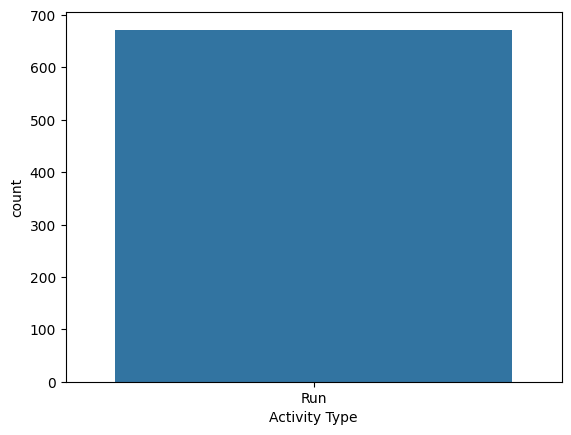

In [231]:
sns.countplot(x='Activity Type', data=data5)

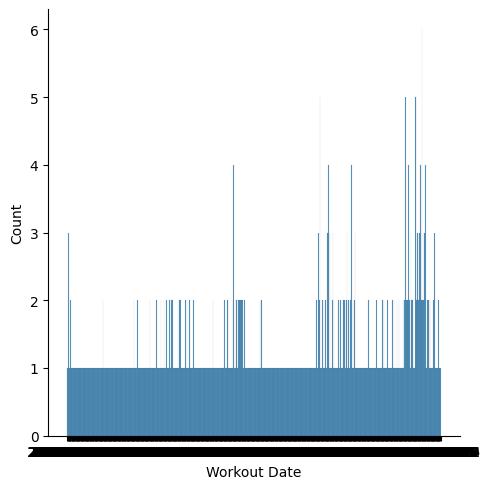

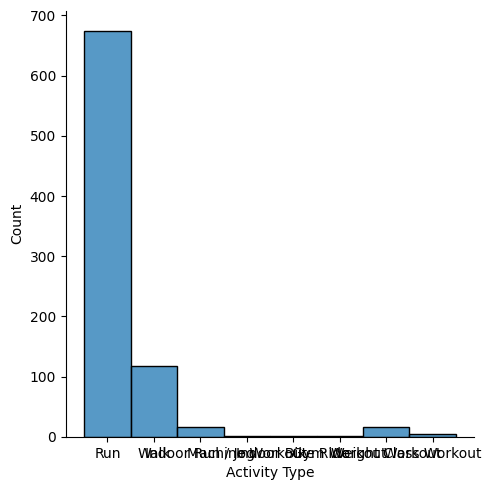

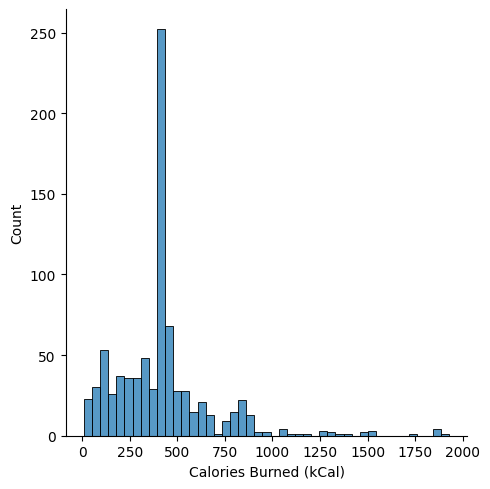

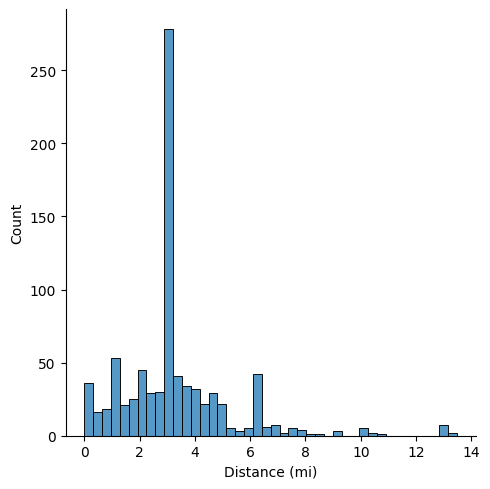

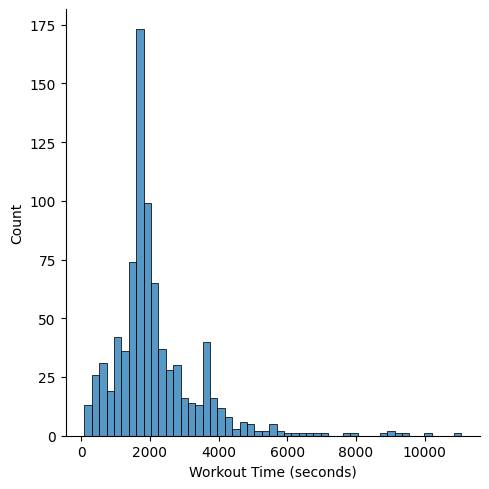

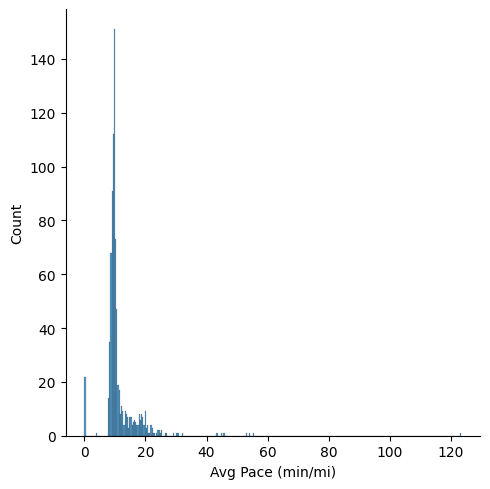

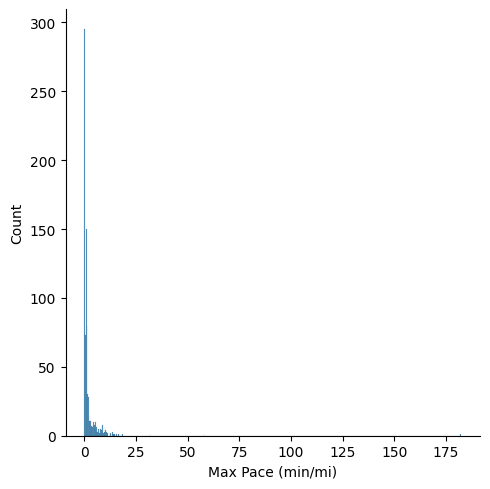

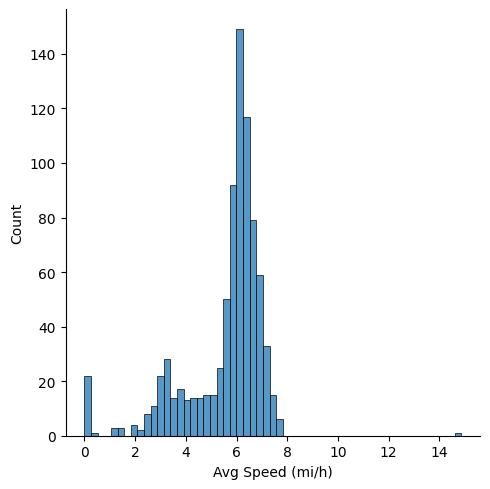

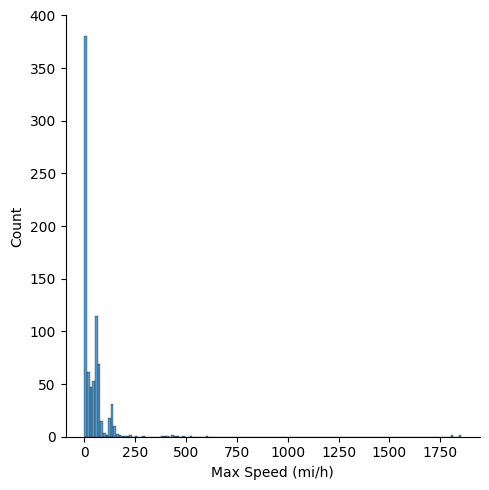

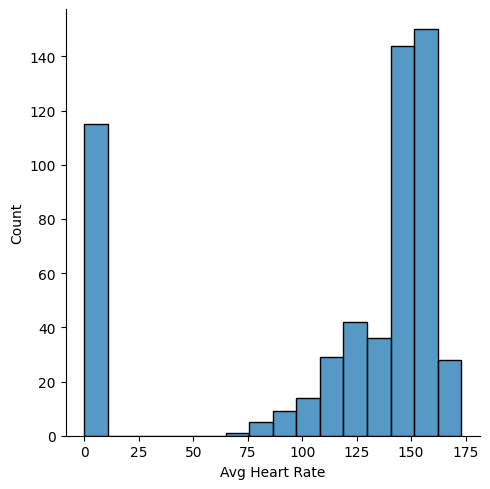

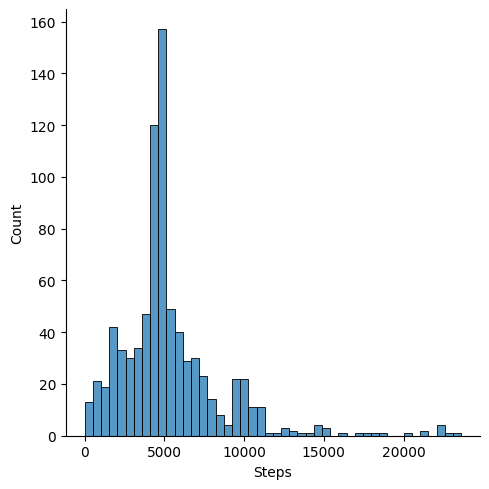

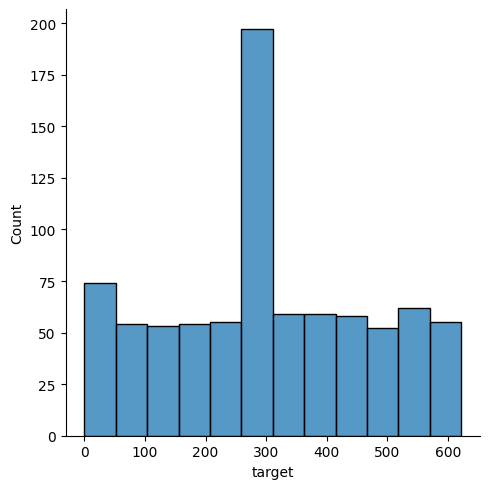

In [232]:
for column in data5:
    sns.displot(x=column, data=data)

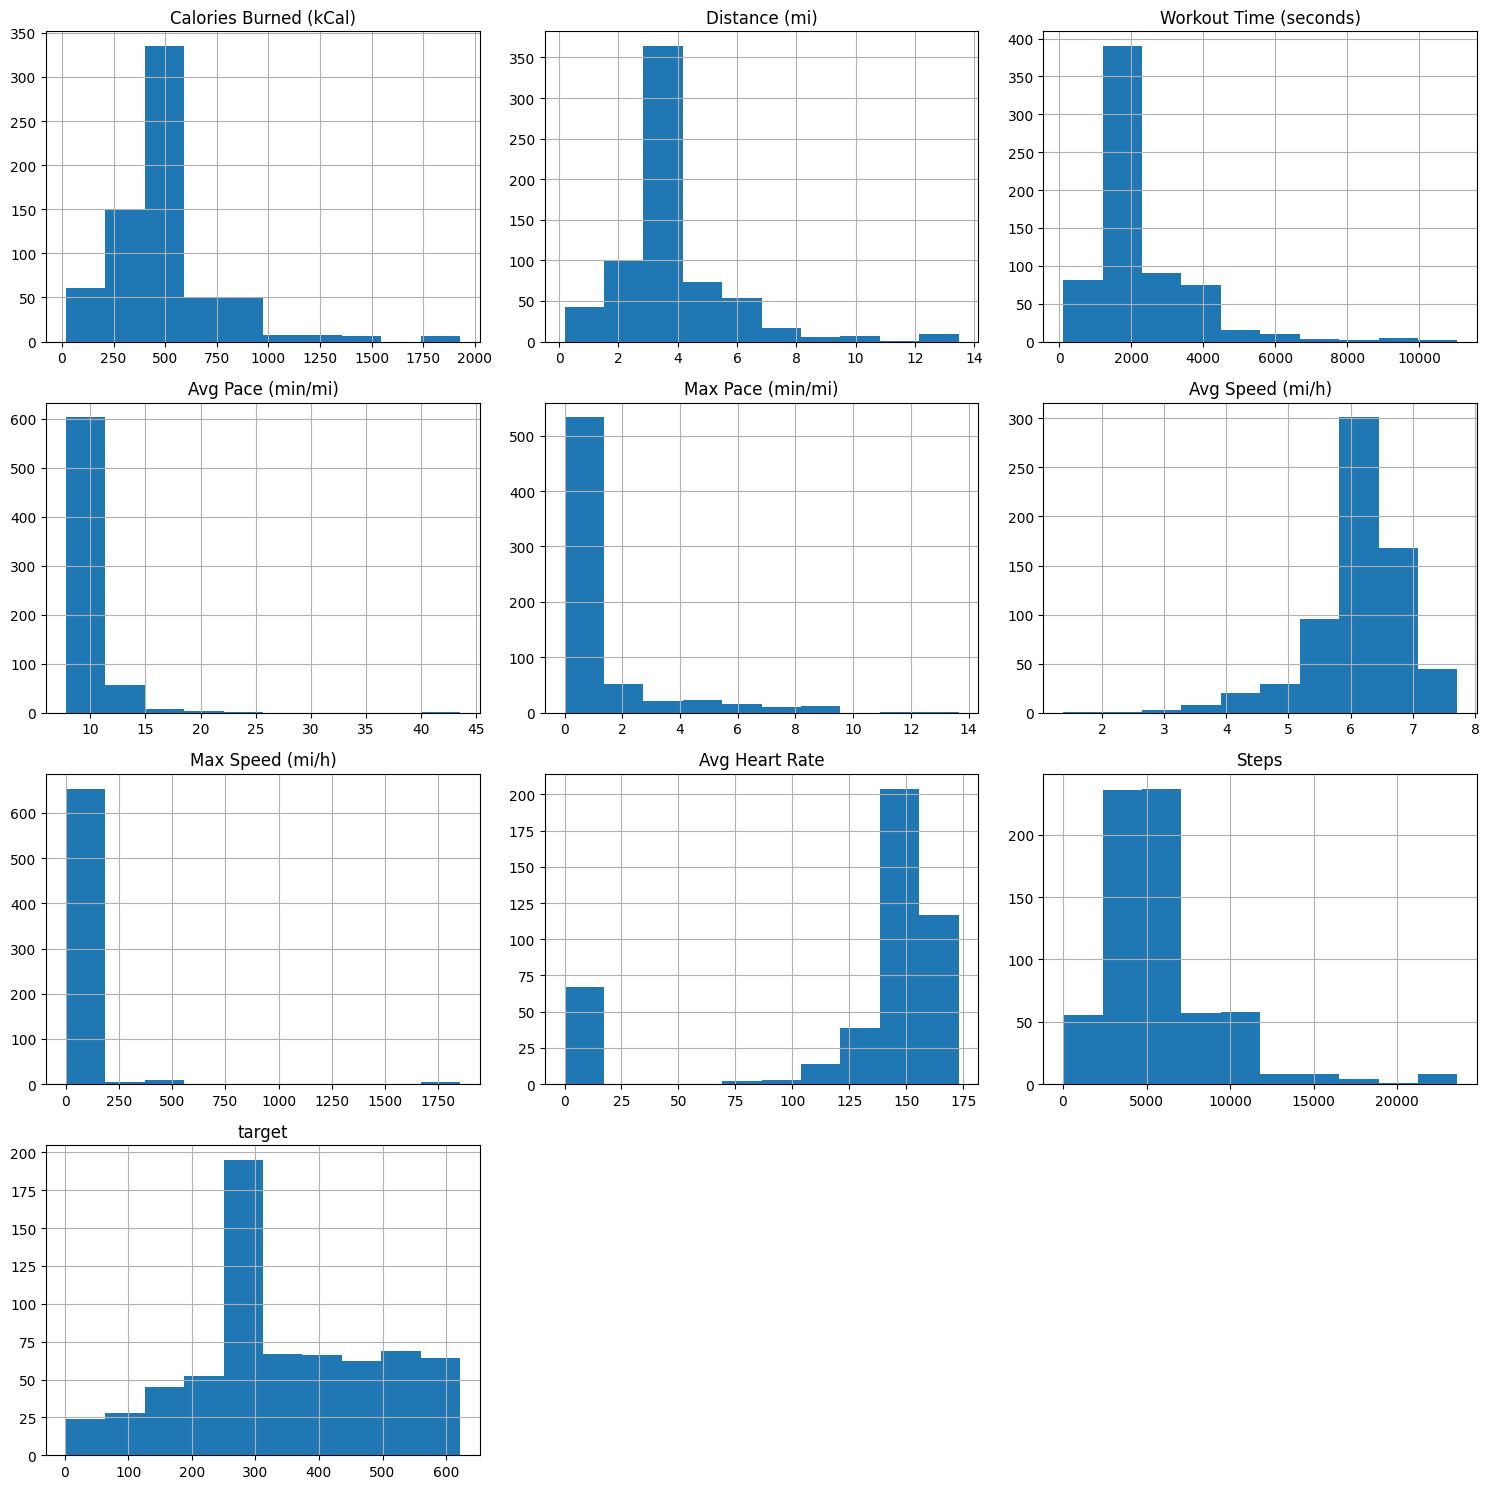

In [233]:
data5.hist(figsize=(15,15)) 
#set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

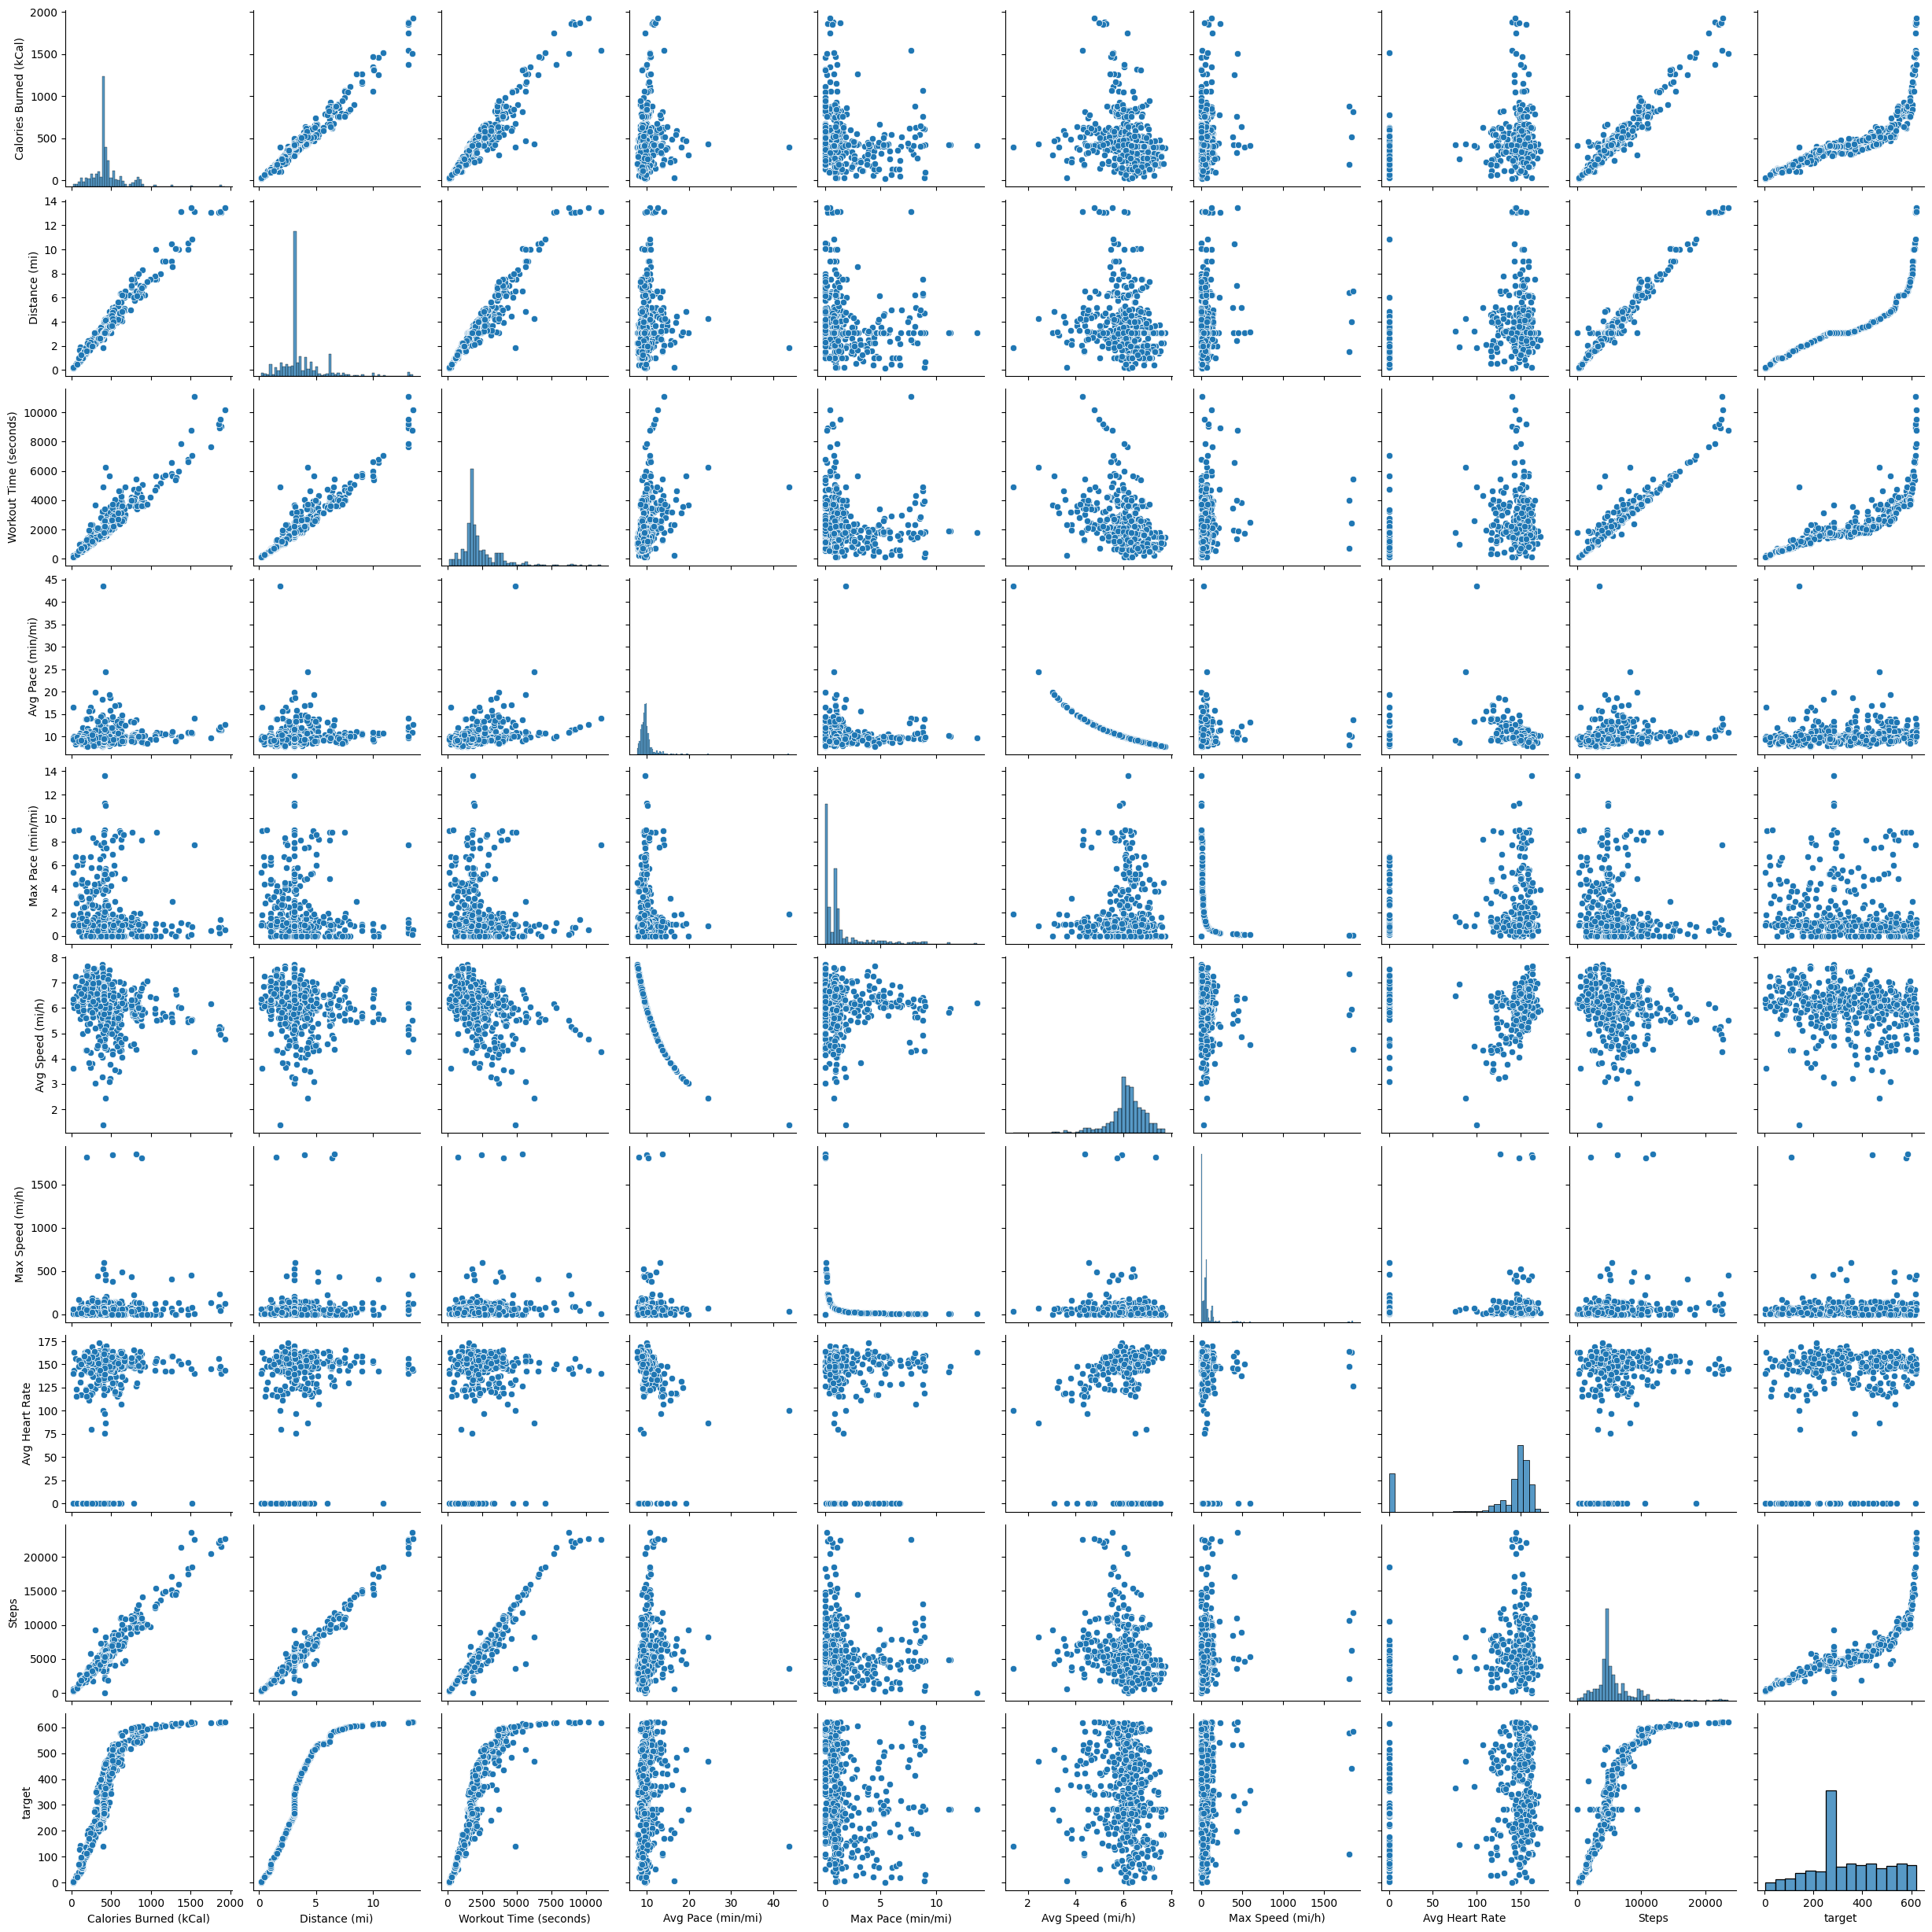

In [234]:
sns.pairplot(data5)

KeyError: "None of [Index(['Workout Date'], dtype='object')] are in the [columns]"

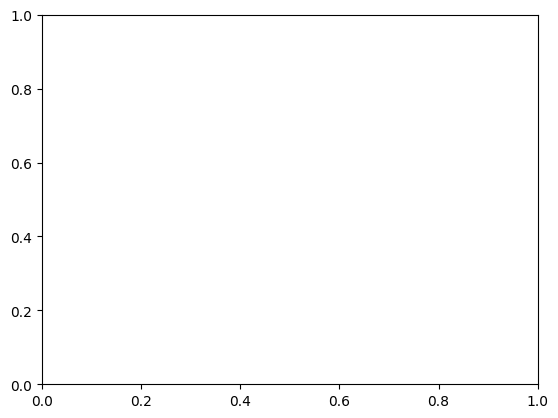

In [235]:
for column in data5:
    plt.figure()
    data.boxplot([column])

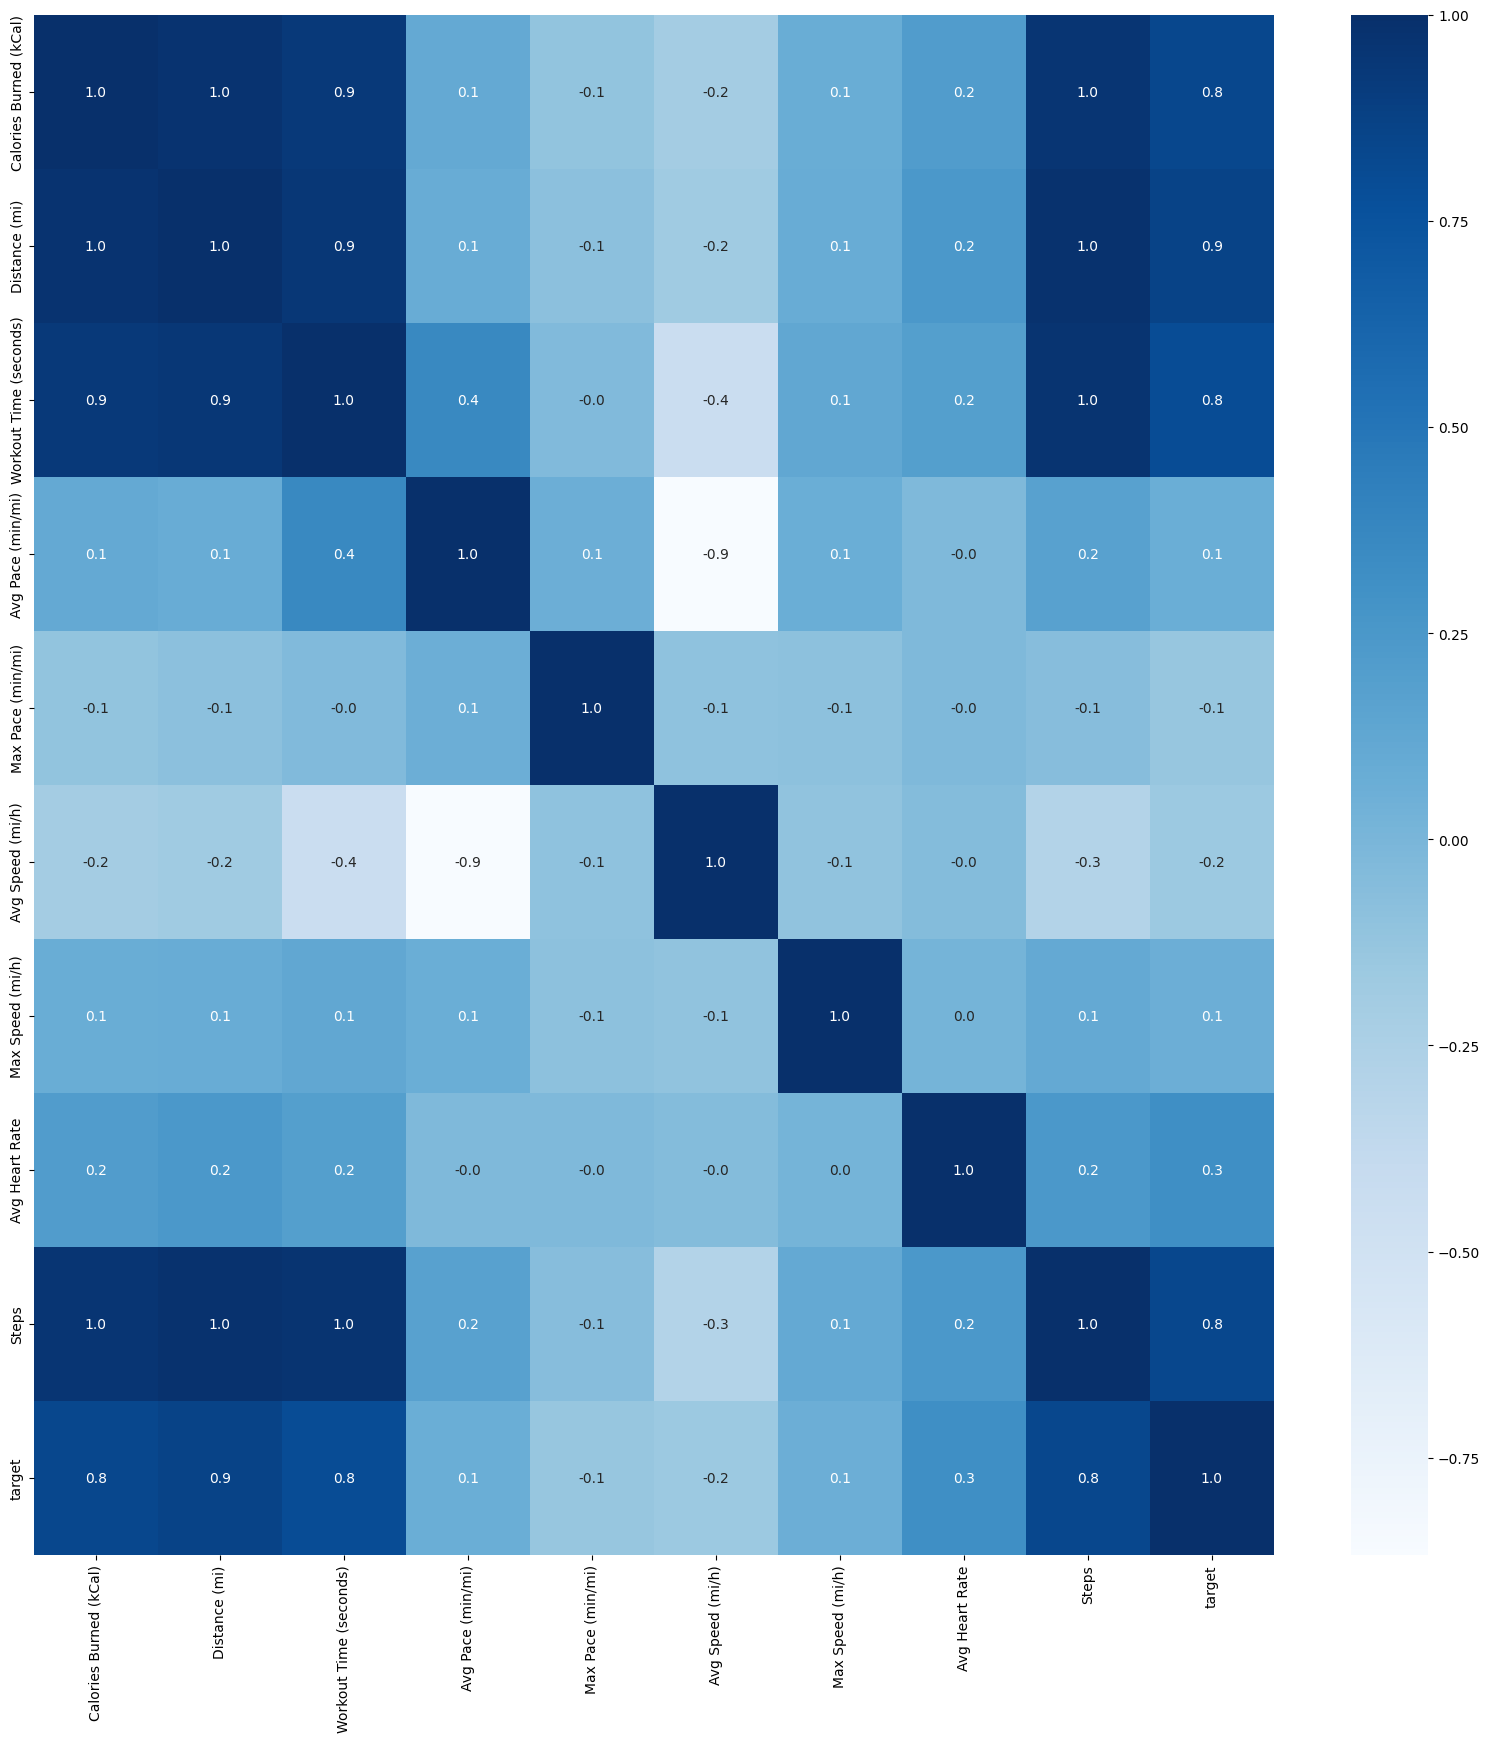

In [ ]:
correlation_matrix = data5.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

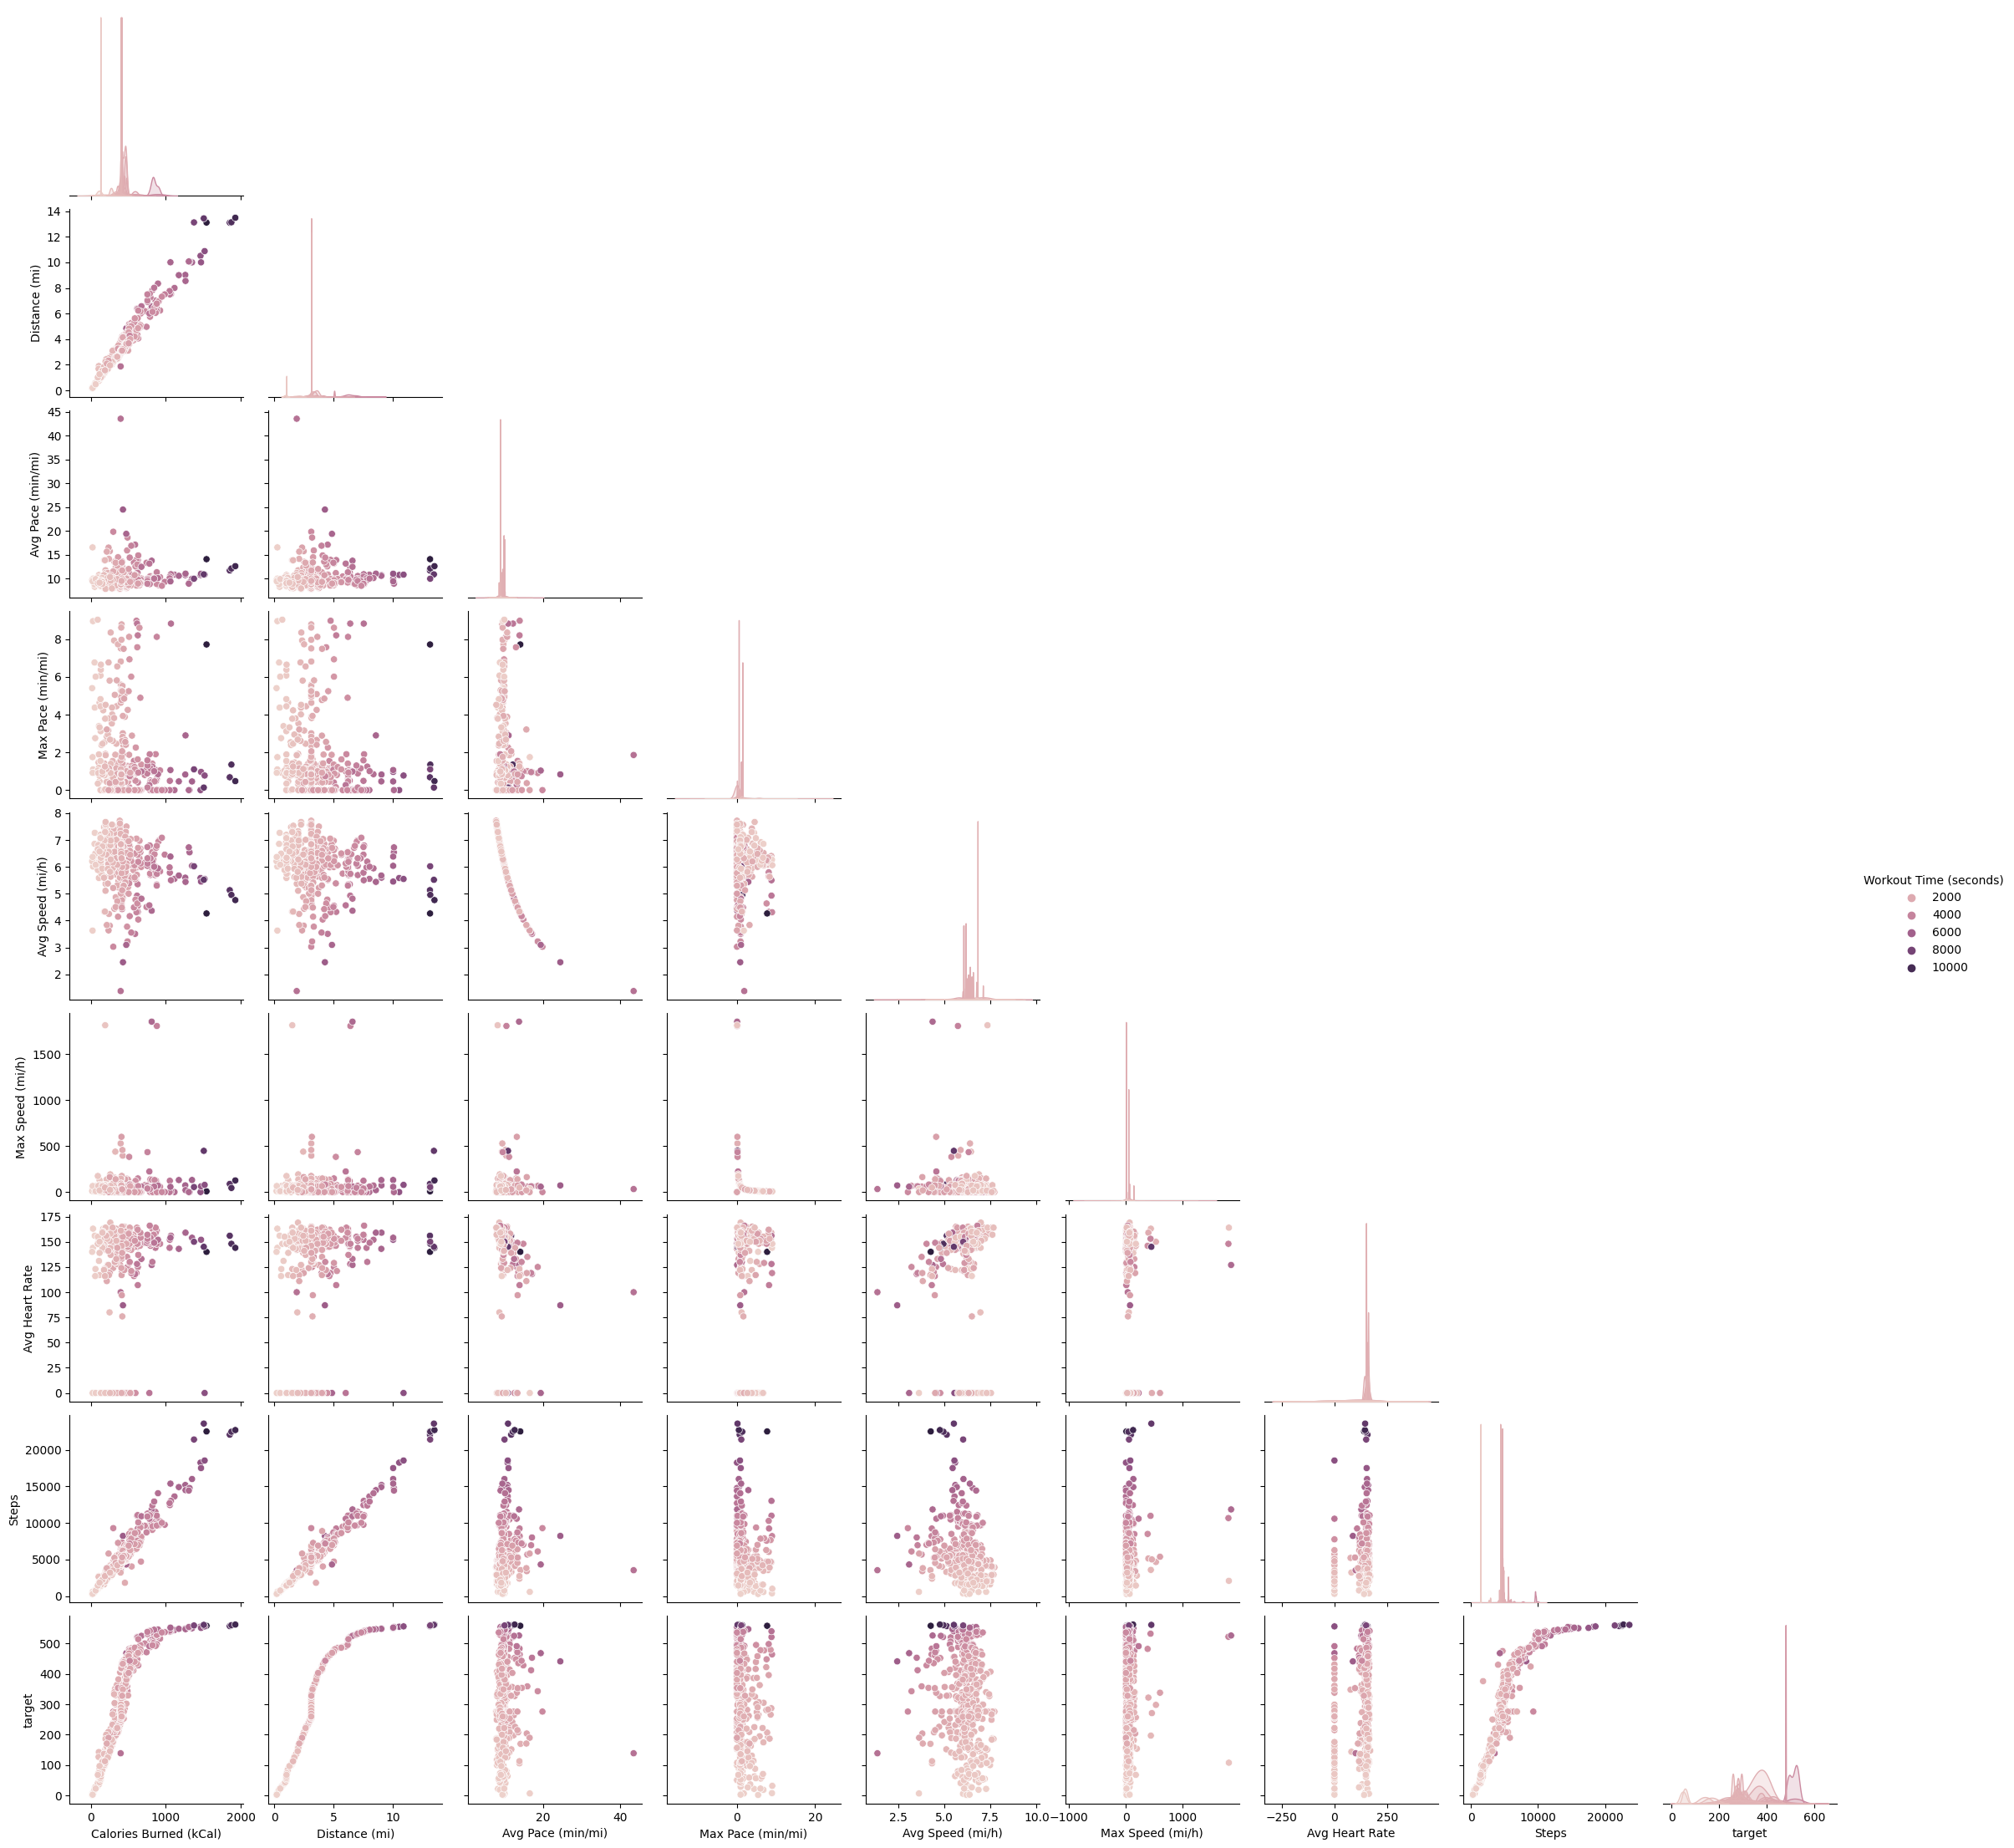

In [ ]:
sns.pairplot(data5, corner=True, hue = 'Workout Time (seconds)')